<a href="https://colab.research.google.com/github/thabetAljbreen/RepoT5/blob/main/T5MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vehicle Classification Using CNN

1. Read all images and convert to dataframe
2. Check data distribution
3. Data Augmentation
4. Define Model
5. Train Model
6. Evaluate the model


# Import Library
We need to import some of the libraries to be used.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip "/content/drive/MyDrive/Colab Notebooks/archive (4).zip"

Streaming output truncated to the last 5000 lines.
  inflating: data/vehicles/4414.png  
  inflating: data/vehicles/4415.png  
  inflating: data/vehicles/4416.png  
  inflating: data/vehicles/4417.png  
  inflating: data/vehicles/4418.png  
  inflating: data/vehicles/4419.png  
  inflating: data/vehicles/442.png   
  inflating: data/vehicles/4420.png  
  inflating: data/vehicles/4421.png  
  inflating: data/vehicles/4422.png  
  inflating: data/vehicles/4423.png  
  inflating: data/vehicles/4424.png  
  inflating: data/vehicles/4425.png  
  inflating: data/vehicles/4426.png  
  inflating: data/vehicles/4427.png  
  inflating: data/vehicles/4428.png  
  inflating: data/vehicles/4429.png  
  inflating: data/vehicles/443.png   
  inflating: data/vehicles/4430.png  
  inflating: data/vehicles/4431.png  
  inflating: data/vehicles/4432.png  
  inflating: data/vehicles/4433.png  
  inflating: data/vehicles/4434.png  
  inflating: data/vehicles/4435.png  
  inflating: data/vehicles/4436.png  

In [3]:
import tensorflow as tf
import os
import cv2
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
import numpy as np
# import warnings
# warnings.filterwarnings('ignore')

base_dir = "/content/data"


# 1. Read images and convert to dataframe

First we need to read all images and label in directory and assign to list variable

In [4]:

label = []
images_path = []
all_images = []
idx = 0
img_label = []



for directory in os.listdir(base_dir):
    label.append(directory)
    for img in os.listdir(os.path.join(base_dir,directory)):
        if len(re.findall('.png',img.lower())) != 0 or len(re.findall('.jpg',img.lower())) != 0 or len(re.findall('.jpeg',img.lower())) != 0:
            img_path = os.path.join(os.path.join(base_dir,directory),img)
            all_images.append(img)
            images_path.append(img_path)
            img_label.append(directory)






In [5]:
img_shape = cv2.imread(images_path[0])

print(f"Labels : { label}")
print(f"Total Images : {len(all_images)}")
print(f" Images shape : {img_shape.shape}")

Labels : ['vehicles', 'non-vehicles']
Total Images : 17760
 Images shape : (64, 64, 3)


In [6]:
data =pd.DataFrame({'image':images_path,'label':img_label})
data

,image,label
0,/content/data/vehicles/2751.png,vehicles
1,/content/data/vehicles/middle (378).png,vehicles
2,/content/data/vehicles/1680.png,vehicles
3,/content/data/vehicles/3646.png,vehicles
4,/content/data/vehicles/2931.png,vehicles
...,...,...
17755,/content/data/non-vehicles/image1238.png,non-vehicles
17756,/content/data/non-vehicles/image281.png,non-vehicles
17757,/content/data/non-vehicles/image2693.png,non-vehicles
17758,/content/data/non-vehicles/image777.png,non-vehicles


- Shuffle dataset distributuin

In [7]:

data = shuffle(data).reset_index(drop=True)
data.head()


,image,label
0,/content/data/non-vehicles/extra1469.png,non-vehicles
1,/content/data/non-vehicles/image1088.png,non-vehicles
2,/content/data/vehicles/right (243).png,vehicles
3,/content/data/vehicles/far (445).png,vehicles
4,/content/data/non-vehicles/image1748.png,non-vehicles


- plot first 8 images

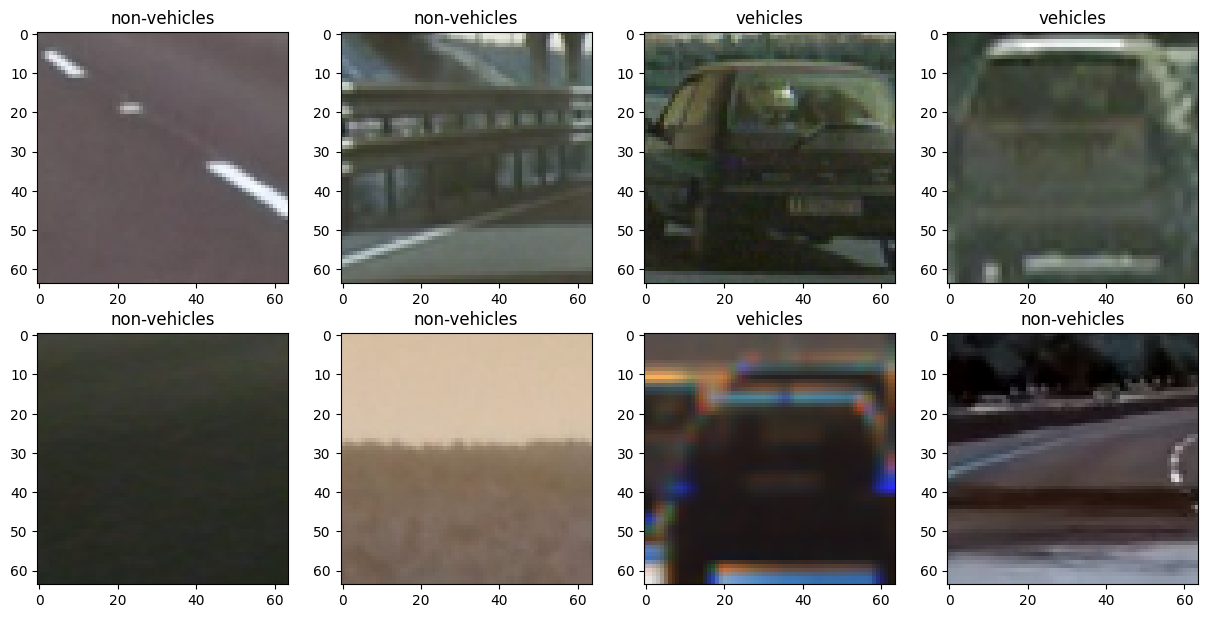

In [8]:
fig = plt.figure(figsize=(15,15))

for i in range(8):
    fig.add_subplot(4,4,i+1).set_title(data['label'][i])
    img = cv2.imread(data['image'][i])
    plt.imshow(img)

plt.show()


# 2. Check Data Distribution

We need to check the data distribution class. From the bar plot we can see either vehicle and non vehicle have similiar amount of data

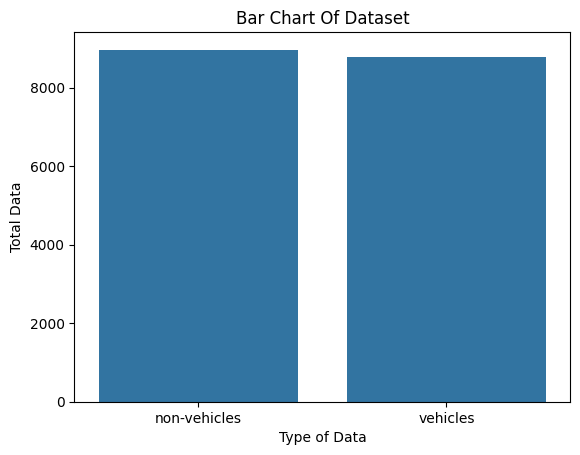

Total Images class [0]:8968
Total Images class [1]:8792


<ipython-input-9-575e1c6b1574>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Total Images class [0]:{data_label[0]}")
<ipython-input-9-575e1c6b1574>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Total Images class [1]:{data_label[1]}")


In [9]:


data_label = data['label'].value_counts()
plt.figure()
sns.barplot(x = data_label.index, y = data_label)
plt.xlabel("Type of Data")
plt.ylabel("Total Data")
plt.title("Bar Chart Of Dataset")
plt.show()
print(f"Total Images class [0]:{data_label[0]}")
print(f"Total Images class [1]:{data_label[1]}")

- Split data to data training and data testing

In [10]:
X_train,X_test = train_test_split(data,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)

(14208, 2)
(3552, 2)


# 3. Data Augmentation



In [11]:


train_datagen = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2, # cutting
                                    zoom_range = 0.1,
                                    rotation_range = 25,
                                    width_shift_range = 0.1,
                                    height_shift_range = 0.1,
                                    horizontal_flip = True,
                                    validation_split = 0.2)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
training_set = train_datagen.flow_from_dataframe(
    dataframe = X_train,
    x_col = "image",
    y_col = "label",
    target_size = (64, 64),
    color_mode = "rgb",
    class_mode = "categorical",
    batch_size = 32,
    shuffle = True,
    seed = 2,
    subset = "training")

validation_set = train_datagen.flow_from_dataframe(
    dataframe = X_train,
    x_col = "image",
    y_col = "label",
    target_size = (64, 64),
    color_mode ="rgb",
    class_mode = "categorical",
    batch_size = 32,
    shuffle = True,
    seed = 2,
    subset = "validation")

test_set = test_datagen.flow_from_dataframe(
    dataframe = X_test,
    x_col = "image",
    y_col = "label",
    target_size = (64, 64),
    color_mode ="rgb",
    class_mode = "categorical",
    shuffle = False,
    batch_size = 32)


Found 11367 validated image filenames belonging to 2 classes.
Found 2841 validated image filenames belonging to 2 classes.
Found 3552 validated image filenames belonging to 2 classes.


In [13]:
print(f" Total training images {X_train.shape[0]}")
print(f" Total test images {X_test.shape[0]}")

print(f" Train Set Size : {(training_set.samples)}")
print(f" Validation Set Size : {(validation_set.samples)}")
print(f" Testing Set Size : {(test_set.samples)}")

 Total training images 14208
 Total test images 3552
 Train Set Size : 11367
 Validation Set Size : 2841
 Testing Set Size : 3552


# 4. Define Model


In [14]:

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'valid',
                 activation ='relu', input_shape = (64,64,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(64, activation = "relu"))
model.add(Dense(2, activation = "softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer = 'adam', loss= "categorical_crossentropy", metrics=["acc"])

In [16]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=1, verbose=1)


# 5. Train Model
Train model with early stopping

In [17]:

history = model.fit(training_set, epochs=10,validation_data = validation_set, callbacks=[early_stopping],batch_size=32)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


356/356 ━━━━━━━━━━━━━━━━━━━━ 44s 99ms/step - acc: 0.7894 - loss: 0.3997 - val_acc: 0.9109 - val_loss: 0.2033
Epoch 2/10
356/356 ━━━━━━━━━━━━━━━━━━━━ 28s 78ms/step - acc: 0.9664 - loss: 0.0982 - val_acc: 0.9852 - val_loss: 0.0496
Epoch 3/10
356/356 ━━━━━━━━━━━━━━━━━━━━ 41s 78ms/step - acc: 0.9751 - loss: 0.0704 - val_acc: 0.9775 - val_loss: 0.0611
Epoch 3: early stopping


# 6. Evaluate Model


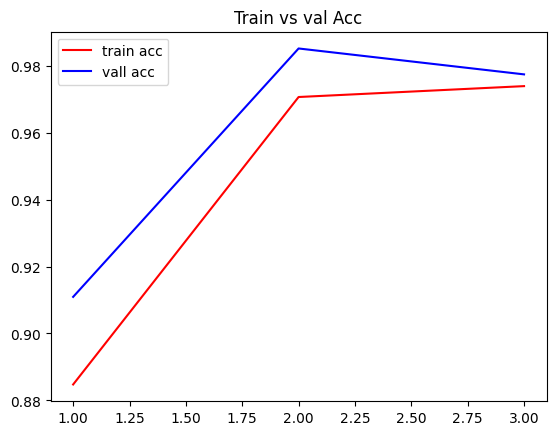

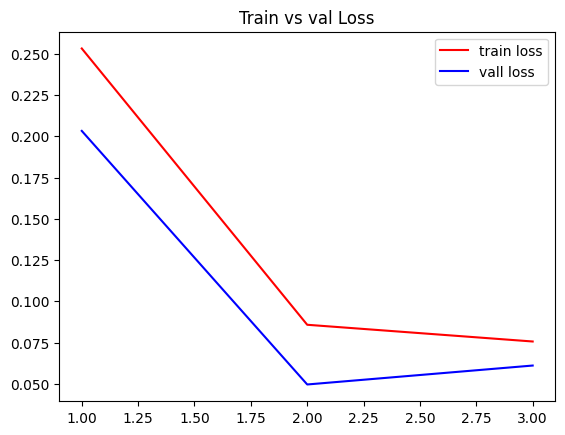

In [18]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history["loss"]
val_loss = history.history['val_loss']

epochs = range(1,len(train_acc)+1)
plt.figure()
plt.title("Train vs val Acc")
plt.plot(epochs,train_acc,'red',label="train acc")
plt.plot(epochs,val_acc,'blue',label="vall acc")
plt.legend()
plt.show()

plt.figure()
plt.title("Train vs val Loss")
plt.plot(epochs,train_loss,'red',label="train loss")
plt.plot(epochs,val_loss,'blue',label="vall loss")
plt.legend()

plt.show()



- Check accuracy from test data

In [ ]:
test_score = model.evaluate(test_set)

111/111 ━━━━━━━━━━━━━━━━━━━━ 18s 166ms/step - acc: 0.9881 - loss: 0.0382


In [ ]:
print(f'Test Score:{test_score[1]}')
print(f'Test Loss:{test_score[0]}')

Test Score:0.9867680072784424
Test Loss:0.04430421441793442


In [ ]:

predicted_label = model.predict(test_set)
predicted_label = np.argmax(predicted_label,axis=1)
predicted_label

111/111 ━━━━━━━━━━━━━━━━━━━━ 18s 164ms/step


array([1, 0, 1, ..., 0, 1, 1])

In [ ]:
test_class =test_set.labels
test_class = np.array(test_class)
test_class2 = test_class.flatten()
test_class2

array([1, 0, 1, ..., 0, 1, 1])

In [ ]:
class_ind = test_set.class_indices
labels_id = list(class_ind.keys())
labels_id

['non-vehicles', 'vehicles']

Using Confusion Matrix and Classification Report To Evaluate The Model

              precision    recall  f1-score   support

non-vehicles       0.98      0.99      0.99      1759
    vehicles       0.99      0.98      0.99      1793

    accuracy                           0.99      3552
   macro avg       0.99      0.99      0.99      3552
weighted avg       0.99      0.99      0.99      3552



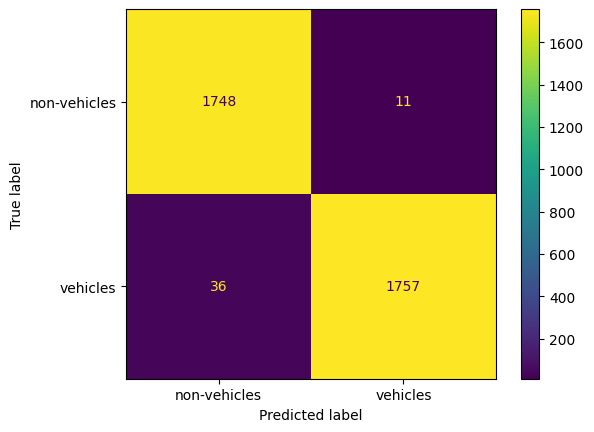

In [ ]:

confusion_data = confusion_matrix(test_class2,predicted_label)

print(classification_report(test_class2, predicted_label, target_names= labels_id))


cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_data, display_labels = labels_id)

cm_display.plot()
plt.show()



- Check Predicted images and labels

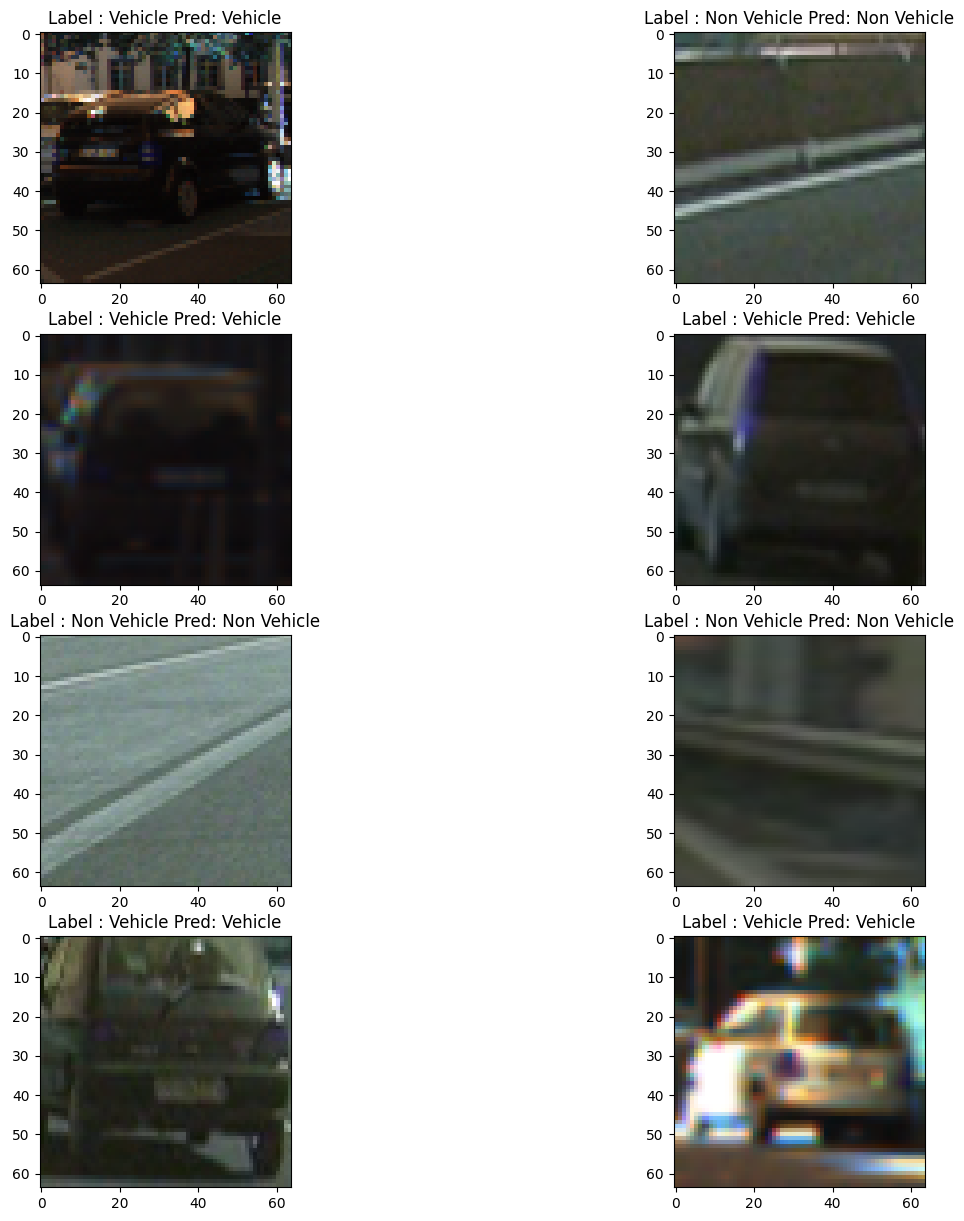

In [ ]:
test_datas = test_set.filenames
labels_data = test_set.labels

fig = plt.figure(figsize=(15,15))

for i in range(8):
    if labels_data[i] == 0:
        test_label = "Non Vehicle"
    else:
        test_label = "Vehicle"
    if predicted_label[i] == 0:
        predict_lab = "Non Vehicle"
    else :
        predict_lab = "Vehicle"
    label = "Label : "+ test_label +" Pred: "+predict_lab

    fig.add_subplot(4,2,i+1).set_title(label)
    img = cv2.imread(test_datas[i])
    plt.imshow(img)

plt.show()
